In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [79]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [80]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [81]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [83]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 1. Analysing SalePrice First

In [84]:
df_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

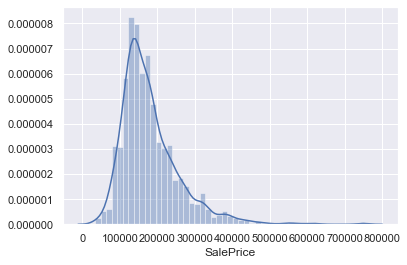

In [85]:
sns.distplot(df_train['SalePrice']);
# As can see from the plot, the 'SalePrice' has some skewnenss. 

In [86]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [87]:
# Next we will start to explore the "SalePrice" relationship with other variables

In [88]:
df_train.corr()['SalePrice'].abs().sort_values(ascending=False).head(16)

# Based on the Series below, these are the top 15 most correlated features with SalePrice   

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64

C:\Users\65811\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


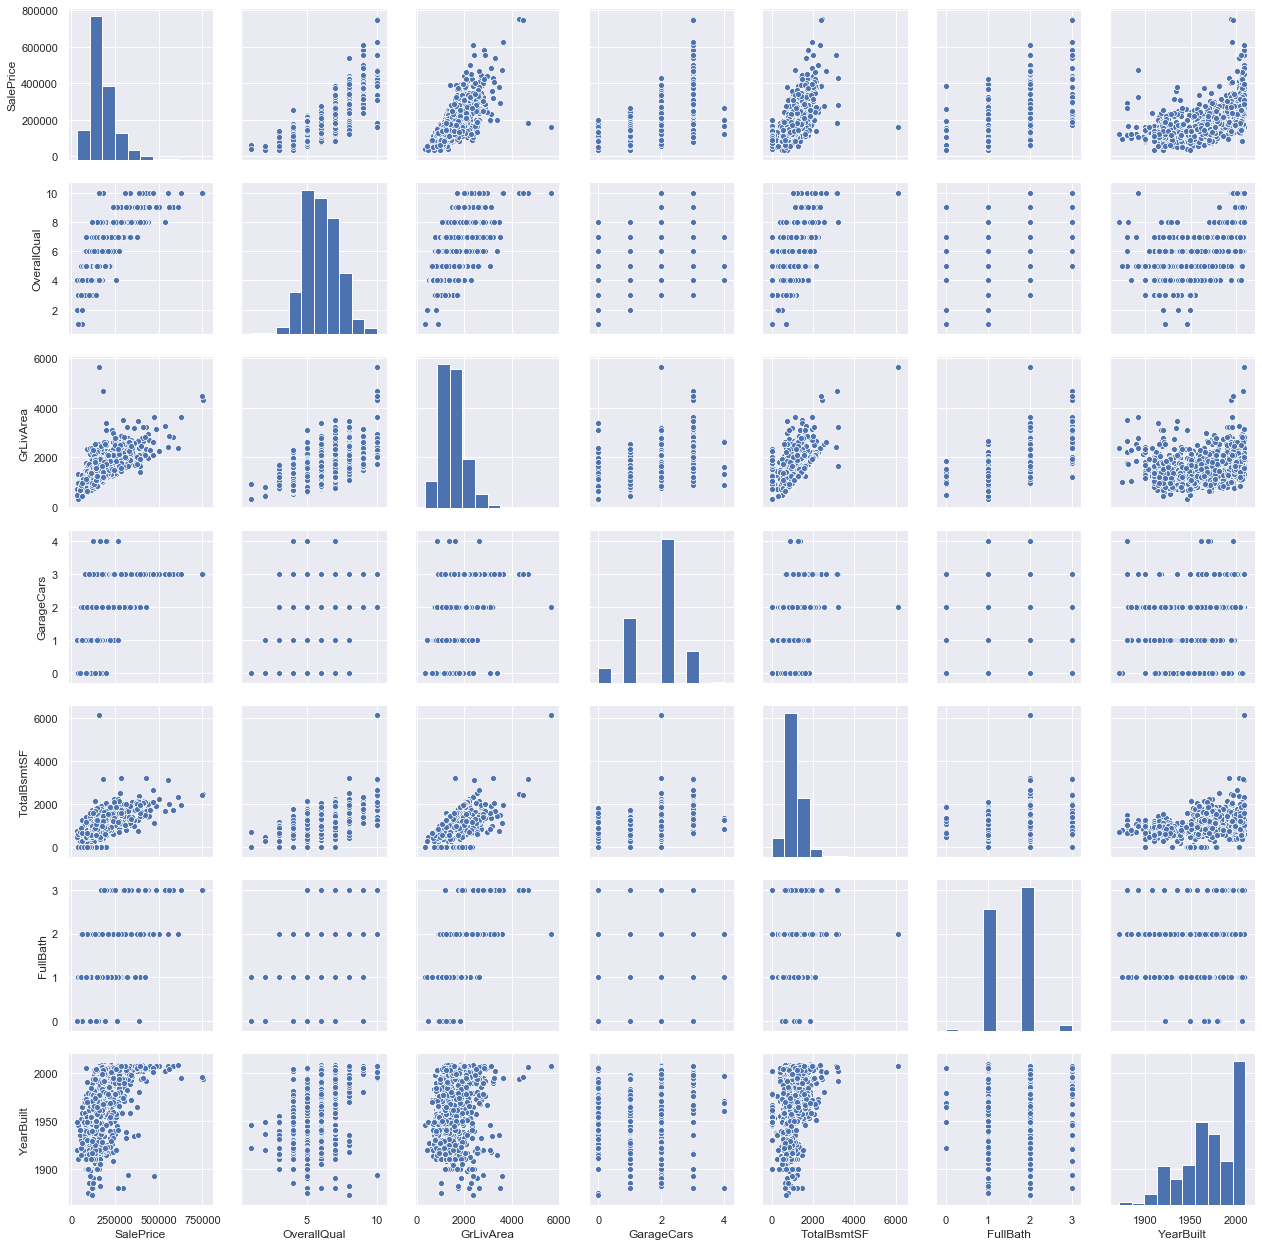

In [89]:
# SalePrice between some correlated features

#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# 2. Handle Missing Data

In [90]:
# Handle missing data for Training Data

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# Based on the diagram below, we can see the total and percentage of missing data in these variables. 

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [91]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() 

0

In [92]:
# Handling Missing Data for Test Data

t_total = df_test.isnull().sum().sort_values(ascending=False)
t_percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
t_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
t_missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [93]:
#dealing with missing data
df_test = df_test.drop((t_missing_data[t_missing_data['Total'] > 1]).index,1)
df_test = df_test.drop(df_test.loc[df_test['Electrical'].isnull()].index)
df_test.isnull().sum().max() 

4

In [94]:
df_test.isnull().sum().sort_values(ascending=False)

MSZoning         4
BsmtHalfBath     2
BsmtFullBath     2
Functional       2
Utilities        2
Exterior2nd      1
KitchenQual      1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
SaleType         1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
Exterior1st      1
OverallCond      0
RoofMatl         0
ExterQual        0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
SaleCondition    0
OverallQual      0
HouseStyle       0
ExterCond        0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSSubClass       0
BldgType         0
Heating          0
Foundation       0
Fireplaces       0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
TotRmsAbvGrd     0
HeatingQC        0
KitchenAbvGr     0
BedroomAbvGr

In [95]:
# As the number of null values is few, we will drop them 

df_test = df_test.dropna()

In [96]:
df_test.isnull().sum().max() 

0

# 3. Handling outliers

### Establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [33]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


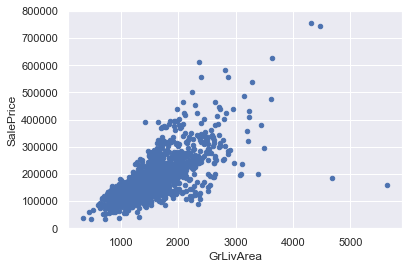

In [34]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# As seen in the below diagram, there are two points in the lower right corner that  lies far away from the rest of the point. 
# These two points looks like outliers and we will remove them accordingly. 

In [36]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


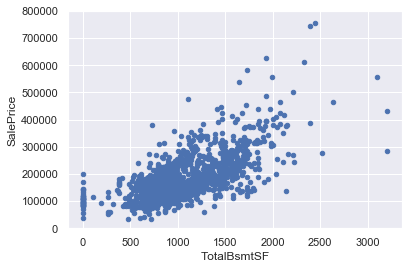

In [37]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# 4. Convert categorical variable into Numeric


In [98]:
# Categorical boolean mask
categorical_feature_mask = df_train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = df_train.columns[categorical_feature_mask].tolist()

In [99]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [100]:
# Categorical boolean mask
categorical_feature_mask_test = df_test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = df_test.columns[categorical_feature_mask_test].tolist()

In [101]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_test[categorical_cols_test] = df_test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

# 5. Linear Regression 

In [ ]:
# We will split our df_train into training set and testing set. We will train on the training set and test on the test set. 

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('SalePrice', axis=1), df_train['SalePrice'], test_size=0.1, random_state=101)

In [122]:
y_train.values.shape

(1313,)

In [123]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [129]:
# Creating and training the model 

(1313, 62)

In [130]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [131]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
# Prediction from our model 

In [136]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)
predictions

array([[ 0.28657125],
       [-0.09275847],
       [-1.41960603],
       [-0.26013821],
       [-0.20773724],
       [ 0.02124692],
       [ 1.19681361],
       [ 0.15398586],
       [-0.18539201],
       [-0.40943456],
       [-0.52185201],
       [ 0.26984569],
       [ 0.66837473],
       [-0.26000031],
       [-1.18134052],
       [-1.02116086],
       [ 0.63714422],
       [ 0.96090899],
       [-0.72128383],
       [-0.63975703],
       [-0.84690792],
       [ 2.38231694],
       [ 0.28594244],
       [ 0.56797781],
       [-1.35150459],
       [-0.98733314],
       [-0.8053314 ],
       [ 0.32822191],
       [-0.76782962],
       [-0.88454896],
       [ 0.55367208],
       [-0.93645456],
       [ 1.36216038],
       [ 0.37831056],
       [-0.57272791],
       [-0.77045566],
       [ 1.93846716],
       [-0.272149  ],
       [ 2.48582677],
       [ 0.54958438],
       [ 0.13763613],
       [ 0.07506882],
       [ 0.44152034],
       [-0.87111524],
       [ 0.420221  ],
       [-0

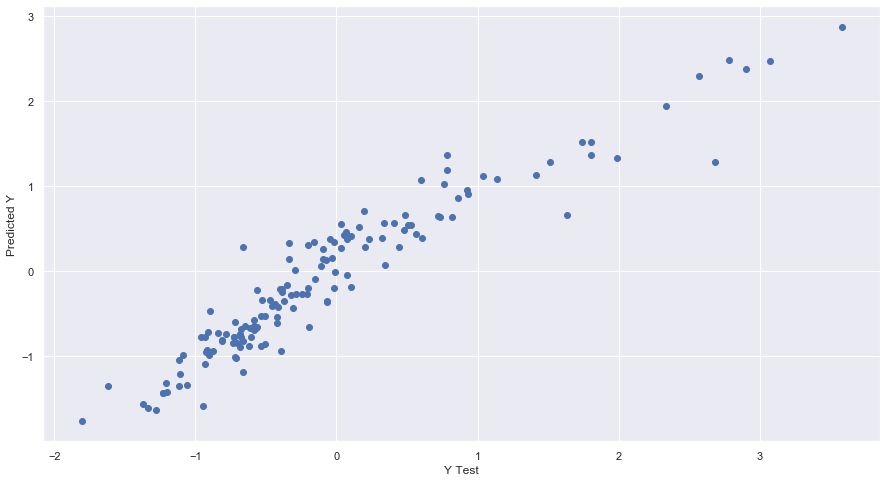

In [138]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

In [139]:
from  sklearn import metrics

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.22332187624070512
MSE: 0.09483323799428828
RMSE: 0.307950057629948


# 6. Using Gradient Boosting Regression

In [141]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

C:\Users\65811\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [145]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)
clf_pred.shape

(146, 1)

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.2020024627003871
MSE: 0.08328460786844216
RMSE: 0.288590727273837


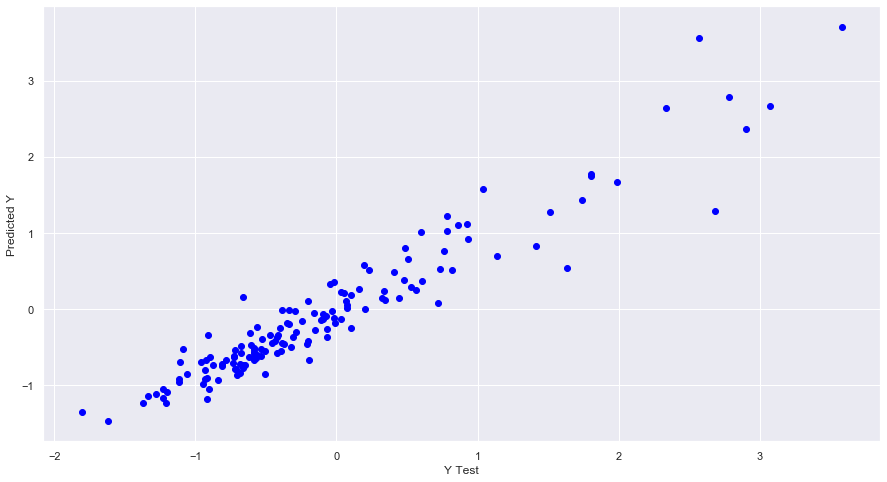

In [150]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 7. Random Forest Regression

In [151]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

C:\Users\65811\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [152]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [153]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.20795119132305878
MSE: 0.08709905385085484
RMSE: 0.29512548831108243


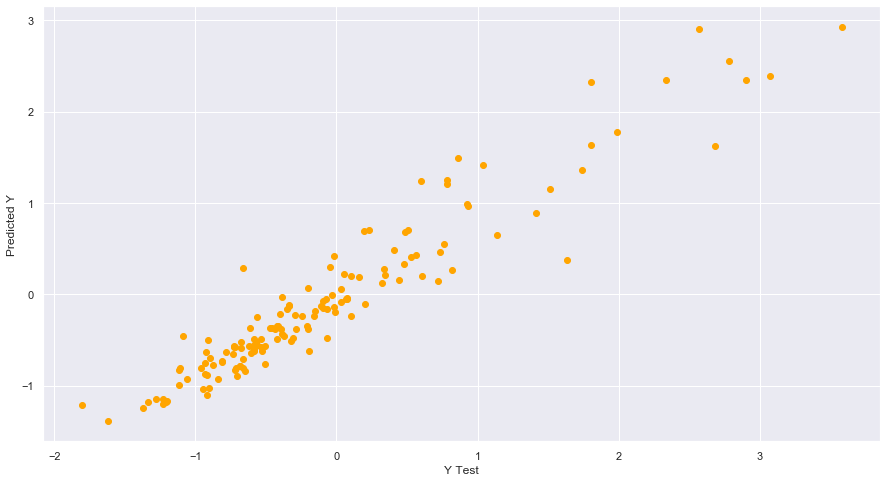

In [154]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 8. Neural Network 

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [181]:
model = Sequential()
model.add(Dense(62, input_dim=62, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 62)                3906      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8064      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 12,099
Trainable params: 12,099
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [183]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 1050 samples, validate on 263 samples
Epoch 1/150
1050/1050 [==============================] - 2s 2ms/sample - loss: 0.5744 - mse: 0.5744 - val_loss: 0.1755 - val_mse: 0.1755
Epoch 2/150
1050/1050 [==============================] - 0s 160us/sample - loss: 0.2652 - mse: 0.2652 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 3/150
1050/1050 [==============================] - 0s 109us/sample - loss: 0.1947 - mse: 0.1947 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 4/150
1050/1050 [==============================] - 0s 171us/sample - loss: 0.1550 - mse: 0.1550 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 5/150
1050/1050 [==============================] - 0s 100us/sample - loss: 0.1296 - mse: 0.1296 - val_loss: 0.1080 - val_mse: 0.1080
Epoch 6/150
1050/1050 [==============================] - 0s 104us/sample - loss: 0.1107 - mse: 0.1107 - val_loss: 0.1229 - val_mse: 0.1229
Epoch 7/150
1050/1050 [==============================] - 0s 105us/sample - loss: 0.1009 - mse: 0.1009 - val_loss: 0.1229 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


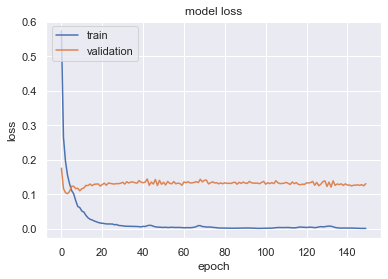

In [184]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [185]:
nn_pred= model.predict(X_test)
nn_pred = nn_pred.reshape(-1,1)

In [186]:
print('MAE:', metrics.mean_absolute_error(y_test, nn_pred))
print('MSE:', metrics.mean_squared_error(y_test, nn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, nn_pred)))

MAE: 0.20761007175767524
MSE: 0.08239127558949993
RMSE: 0.28703880502381546


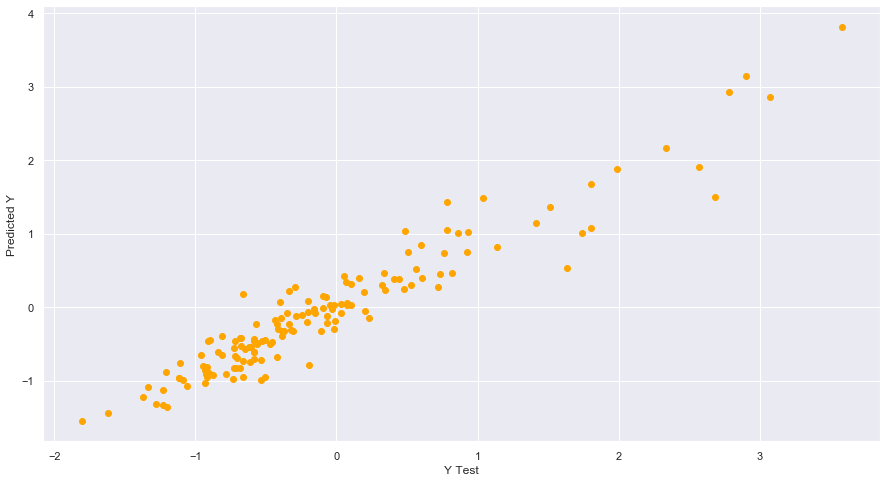

In [187]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,nn_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 9. Comparing Error rate of different models

In [188]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, rfr_pred),metrics.mean_squared_error(y_test, nn_pred)])

In [3]:
error_rate

NameError: name 'error_rate' is not defined

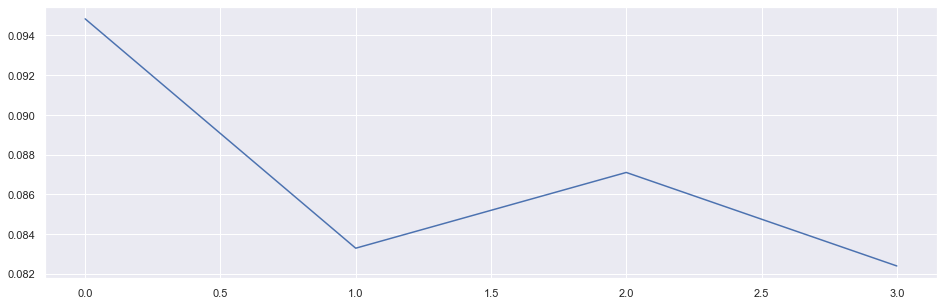

In [190]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

# As we can see from the diagram below, Neural Network seems to be the best model. 

In [191]:
# Time to use the test data

In [192]:
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,9,12,3,4,1,468.0,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,1.0,730.0,2,140,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,10,13,3,4,1,923.0,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,1.0,312.0,2,393,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,9,12,3,4,2,791.0,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,2.0,482.0,2,212,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,9,12,3,4,2,602.0,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2.0,470.0,2,360,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,5,6,2,4,2,263.0,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2.0,506.0,2,0,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,1936,1,3,3,0,4,0,10,2,2,3,4,4,7,1970,1970,1,0,4,5,3,4,1,0.0,0.0,546.0,546.0,0,2,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,0.0,0.0,2,0,0,0,0,0,0,0,6,2006,8,4
1455,2916,160,4,1894,1,3,3,0,4,0,10,2,2,4,4,4,5,1970,1970,1,0,4,5,3,4,1,252.0,0.0,294.0,546.0,0,4,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,1.0,286.0,2,0,24,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,20000,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,0,9,12,3,4,1,1224.0,0.0,0.0,1224.0,0,0,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,2.0,576.0,2,474,0,0,0,0,0,0,9,2006,8,0
1457,2918,85,3,10441,1,3,3,0,4,0,11,2,2,0,5,5,5,1992,1992,1,0,5,14,3,4,2,337.0,0.0,575.0,912.0,0,4,1,3,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,0.0,0.0,2,80,32,0,0,0,0,700,7,2006,8,4


In [193]:
test = sc_X.fit_transform(df_test)
test.shape

(1447, 62)

In [194]:
test_prediction_nn=model.predict(test)
test_prediction_nn= test_prediction_nn.reshape(-1,1)
test_prediction_nn

array([[-0.7001068 ],
       [-0.2275341 ],
       [ 0.25291285],
       ...,
       [ 0.01054597],
       [-0.45504403],
       [ 0.89224994]], dtype=float32)

In [195]:
test_prediction_nn =sc_y.inverse_transform(test_prediction_nn)
test_prediction_nn

array([[125835.36],
       [163455.6 ],
       [201702.66],
       ...,
       [182408.5 ],
       [145344.14],
       [252598.55]], dtype=float32)

In [196]:
test_prediction_nn = pd.DataFrame(test_prediction_nn, columns=['SalePrice'])
test_prediction_nn

# Below is the prediction for test data

,SalePrice
0,125835.359375
1,163455.593750
2,201702.656250
3,196080.812500
4,162177.046875
...,...
1442,88719.914062
1443,101037.453125
1444,182408.500000
1445,145344.140625


## END OF NOTEBOOK. THANK YOU FOR READING. 